# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids

In [3]:
help(pycentroids.find_photons)

Help on function find_photons in module pycentroids.pycentroids:

find_photons(images, threshold=200, box=2, pixel_photon=10, overlap_max=0, sum_min=800, sum_max=1250, return_pixels='none', return_map=False)



## Load test data

In [4]:
!test -f image040.h5 || curl -o image040.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [5]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [6]:
data.shape

(40, 1612, 3304)

In [7]:
#large_data = data.copy()
#for i in range(50):
#    large_data = np.concatenate((large_data, data))

In [8]:
#large_data.shape

## Call the fast code for single photon counting

In [9]:
#timeit.timeit("centroids.find_photons(large_data, 400, 2, store_pixels='none')", globals=globals(), number=1)
#pycentroids.find_photons(data, 400, 2, return_pixels='sorted')

In [10]:
df, out, pixels = pycentroids.find_photons(data, 400, 2, return_pixels='unsorted', return_map=True)

In [11]:
df.shape

(862, 22)

In [12]:
if out is not None:
    print(repr(out.shape))

(40, 1612, 3304)


In [13]:
if pixels is not None:
    print(pixels.shape)
    print()
    print(repr(pixels[0]))

(862, 25)

array([157, 149, 176, 154, 156, 149, 169, 414, 275, 162, 158, 202, 640,
       261, 185, 148, 159, 182, 163, 159, 160, 155, 155, 158, 158],
      dtype=uint16)


In [14]:
df = df[df['Fit Outcome'] < 4]
df.shape

(815, 22)

In [15]:
df

Pixel X  Pixel Y        COM X       COM Y    COR COM X   COR COM Y  \
0      664.0    603.0   664.246168  602.666366   664.245667  602.666333   
1      853.0    820.0   853.345068  820.550835   853.344667  820.550000   
2       37.0    828.0    37.306726  828.604280    37.306167  828.603167   
4      802.0    871.0   802.282014  871.401630   802.280500  871.401500   
6      473.0    872.0   472.780172  872.410099   472.780000  872.408833   
7      478.0    872.0   477.786885  872.204918   477.785500  872.203500   
8      587.0    872.0   587.107563  872.028924   587.106333  872.027500   
9      606.0    872.0   605.755531  871.466814   605.754333  871.466500   
10     708.0    872.0   707.765094  872.359434   707.763500  872.359333   
11     775.0    872.0   774.676937  872.143584   774.675500  872.143000   
12     788.0    872.0   788.085639  871.984991   788.084333  871.983500   
13     822.0    872.0   822.523048  872.059266   822.522500  872.058667   
14     864.0    872.0   864.310377  872.083962   864.309833  872.082500   
16     360.0    873.0   360.025299  873.001632   360.023833  873.000000   
17     433.0    873.0   432.735565  872.916155   432.734167  872.915667   
18     694.0    873.0   694.108841  872.548171   694.108167  872.547167   
19     834.0    873.0   834.289398  872.858644   834.287833  872.857000   
20     618.0    874.0   618.123499  873.704631   618.122833  873.703000   
22     793.0    881.0   793.401423  881.266904   793.399667  881.265833   
23     887.0    906.0   887.177223  906.133902   887.176000  906.133833   
25     757.0    811.0   757.254894  811.335944   757.254833  811.335500   
26     532.0    824.0   532.256579  823.782895   532.254833  823.781833   
27     809.0    844.0   809.433479  844.100034   809.432667  844.099000   
28    2103.0    847.0  2103.478047  846.916181  2103.476667  846.915667   
29     578.0    848.0   578.035047  847.873832   578.034833  847.873500   
30     611.0    871.0   610.606686  871.478779   610.605833  871.478500   
31     471.0    872.0   471.319127  872.312990   471.319000  872.311667   
32     540.0    872.0   540.060268  871.527423   540.058667  871.527000   
33     551.0    872.0   551.300739  871.859655   551.300667  871.858833   
34     630.0    872.0   630.671130  871.935336   630.671000  871.934000   
..       ...      ...          ...         ...          ...         ...   
830    497.0    872.0   497.220175  872.240351   497.220000  872.240167   
831    597.0    872.0   596.882655  872.371273   596.880833  872.370333   
832    611.0    872.0   611.270166  872.028177   611.269500  872.027500   
833    784.0    872.0   784.242562  871.733287   784.242000  871.732333   
834    795.0    872.0   795.189437  872.178243   795.188833  872.177833   
835    490.0    873.0   489.745876  872.523160   489.745167  872.521500   
836    553.0    873.0   553.005848  872.660819   553.005500  872.659000   
837    624.0    873.0   624.274725  873.043956   624.273167  873.042167   
838    640.0    874.0   640.290953  873.727553   640.289667  873.726833   
839    658.0    874.0   658.284398  873.749177   658.284167  873.748833   
840   2308.0    887.0  2308.186207  887.014778  2308.185167  887.014667   
841    604.0    831.0   604.482828  830.687879   604.482167  830.686500   
842    300.0    838.0   300.334515  837.627780   300.333667  837.626000   
843    786.0    871.0   786.465739  871.155246   786.465667  871.154000   
844    531.0    872.0   531.022527  871.935357   531.022000  871.934000   
845    537.0    872.0   537.668581  872.458357   537.667333  872.458333   
846    711.0    872.0   711.165537  872.089061   711.165000  872.088000   
847    834.0    872.0   834.157079  872.072339   834.155833  872.071500   
848    354.0    873.0   353.893542  872.613556   353.891833  872.613167   
849    477.0    873.0   476.902312  873.410290   476.901000  873.408833   
851    515.0    873.0   515.351601  872.846484   515.350167  872.846000   
852    554.0    873.0   554.19

## Plot the results 
### Whole image

<IPython.core.display.Javascript object>


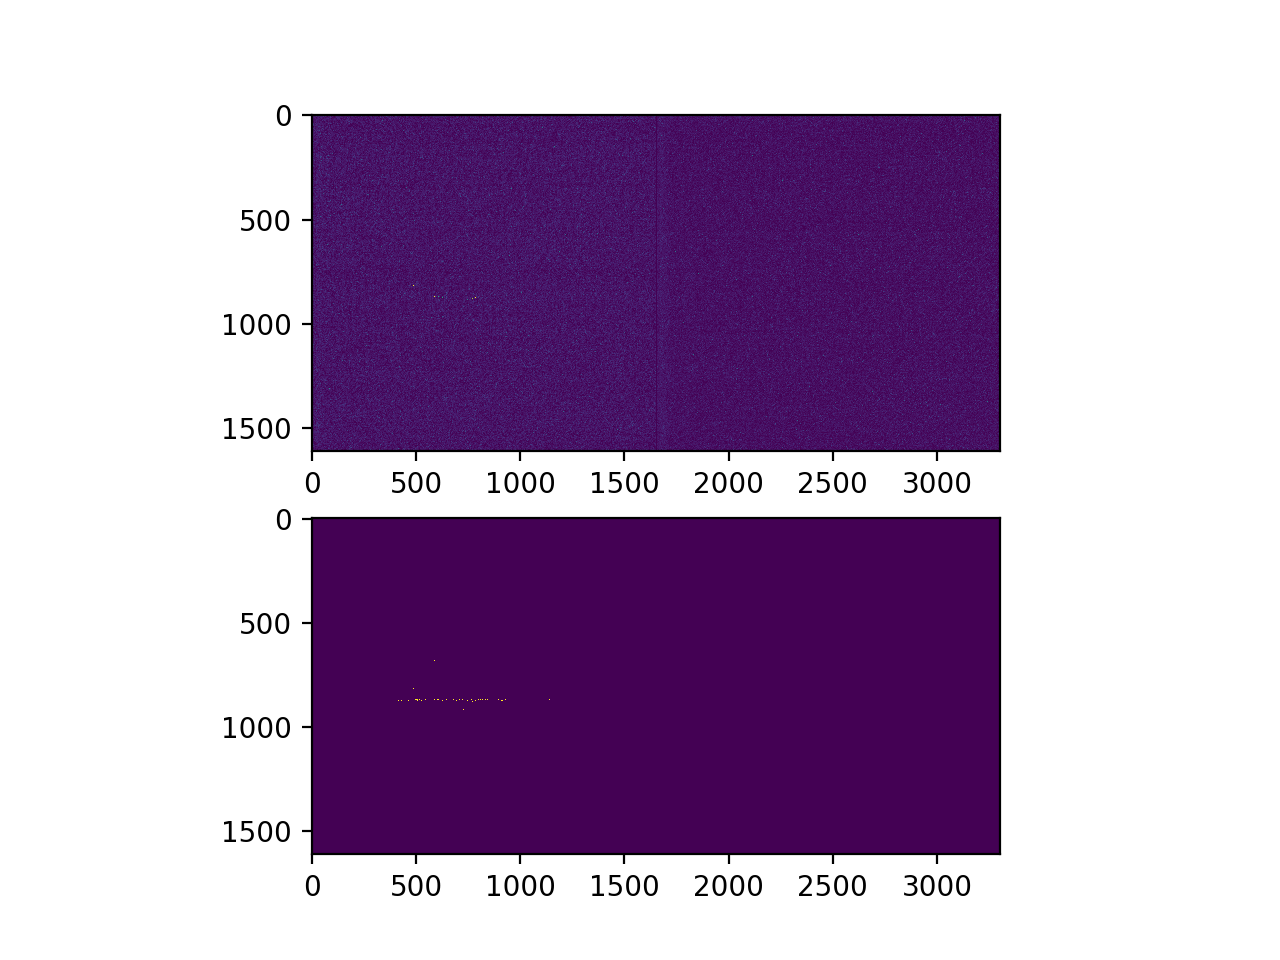

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

<IPython.core.display.Javascript object>


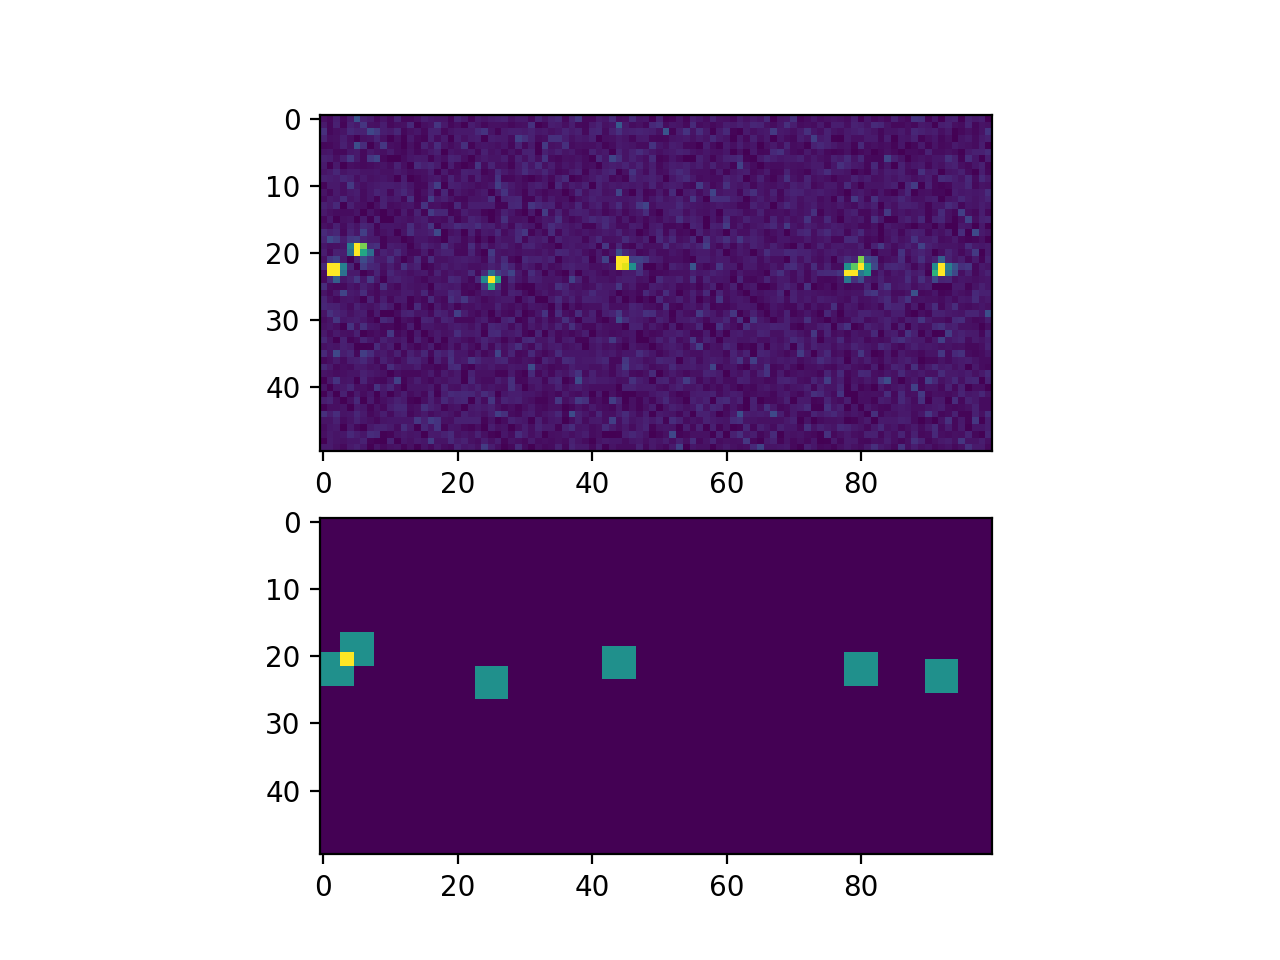

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

<IPython.core.display.Javascript object>


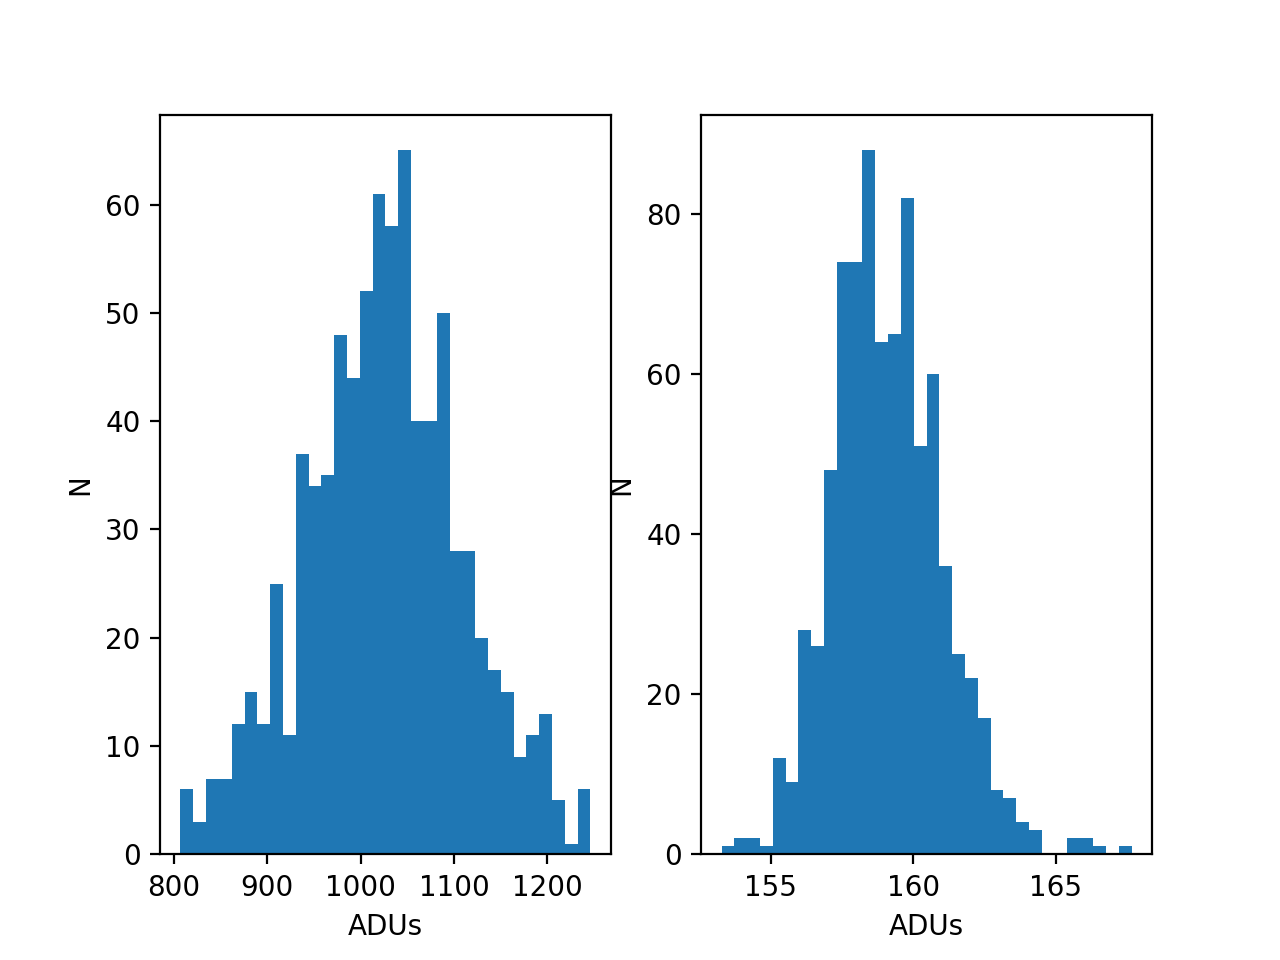

Text(0.5, 0, 'ADUs')

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df['Int'], bins=32)
ax[0].set_ylabel('N')
ax[0].set_xlabel('ADUs')
ax[1].hist(df['Bgnd'], bins=32)
ax[1].set_ylabel('N')
ax[1].set_xlabel('ADUs')

In [19]:
xfrac = df['COM X'] - np.asarray(df['COM X'], dtype=int)
yfrac = df['COM Y'] - np.asarray(df['COM Y'], dtype=int)
xfrac_fit = df['Fit X'] - np.asarray(df['Fit X'], dtype=int)
yfrac_fit = df['Fit Y'] - np.asarray(df['Fit Y'], dtype=int)

<IPython.core.display.Javascript object>


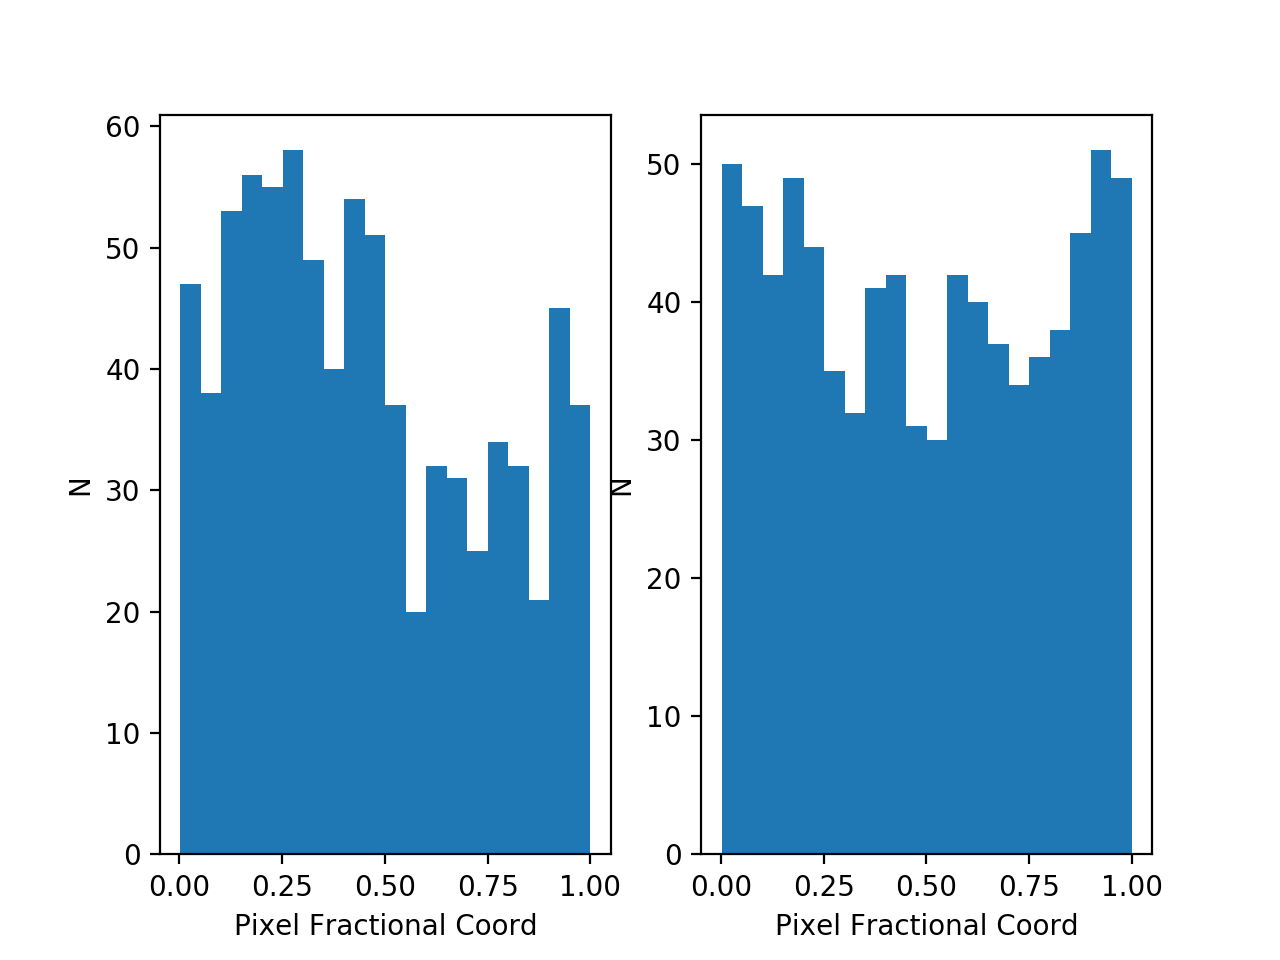

Text(0.5, 0, 'Pixel Fractional Coord')

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20)
ax[1].hist(yfrac_fit, bins=20)
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

<IPython.core.display.Javascript object>


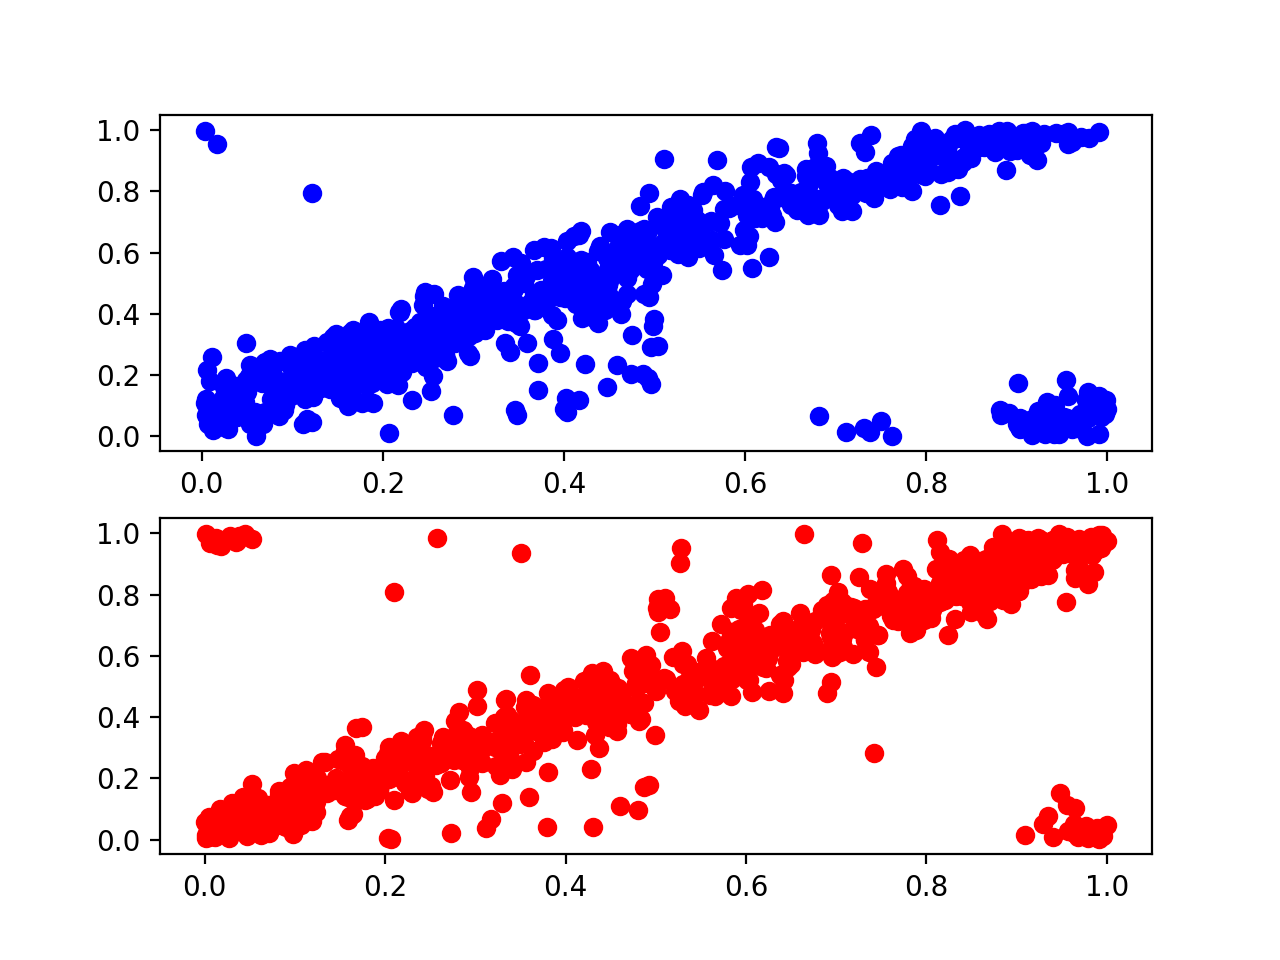

In [21]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xfrac_fit, xfrac, 'bo')
ax[1].plot(yfrac_fit, yfrac, 'ro')

<IPython.core.display.Javascript object>


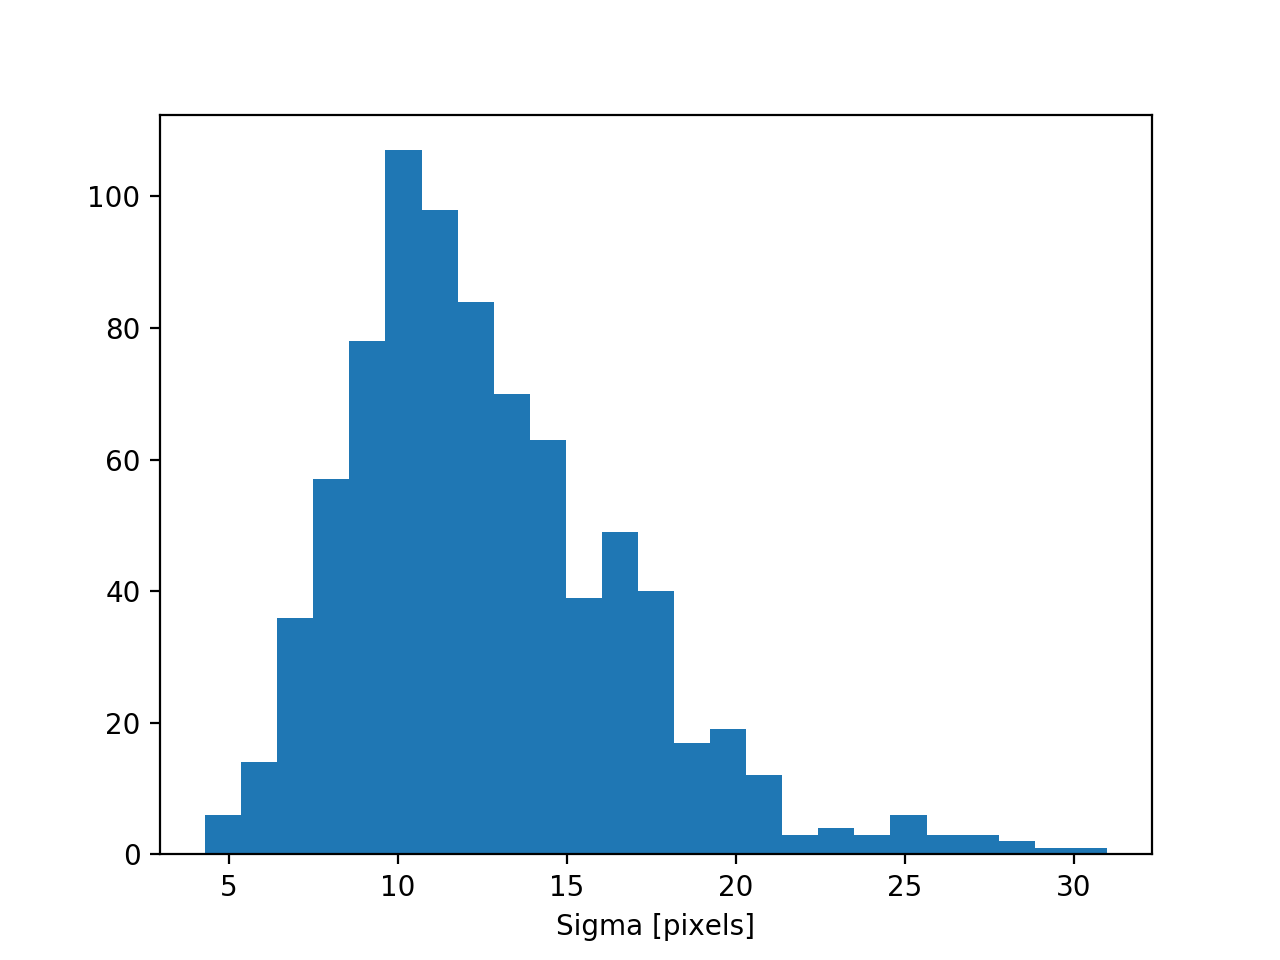

Text(0.5, 0, 'Sigma [pixels]')

In [22]:
fig, ax = plt.subplots(1,1)
ax.hist(df['Fit StdErr'], bins=25)
ax.set_xlabel('Sigma [pixels]')

<IPython.core.display.Javascript object>


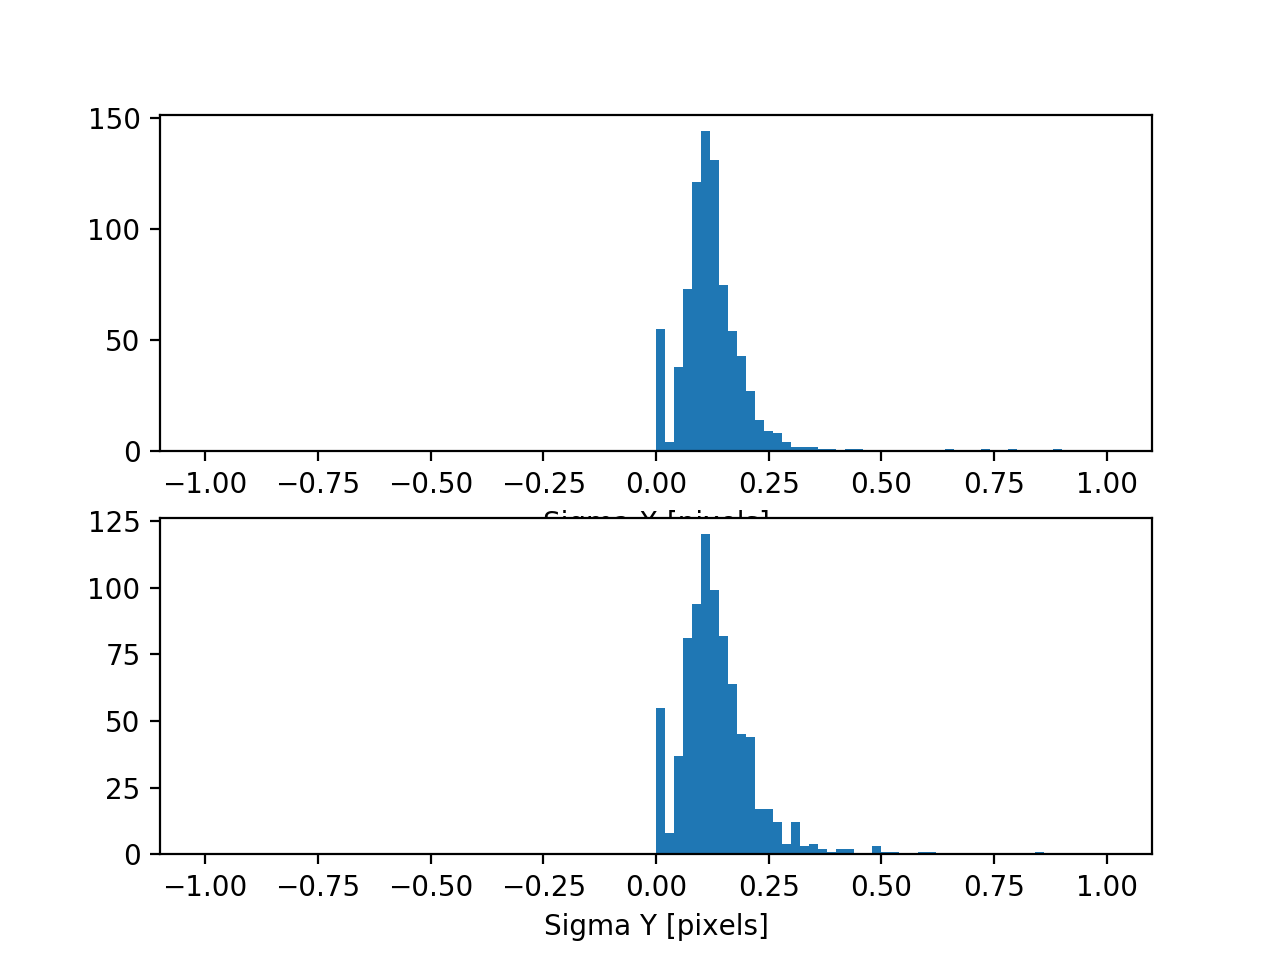

Text(0.5, 0, 'Sigma Y [pixels]')

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].hist(df['Fit Err X'], bins=100, range=(-1,1))
ax[0].set_xlabel('Sigma X [pixels]')
ax[1].hist(df['Fit Err Y'], bins=100, range=(-1,1))
ax[1].set_xlabel('Sigma Y [pixels]')

In [24]:
pycentroids._pycentroids.__version__

'v0.1-63-g8aa033a+'